<IPython.core.display.Math object>

Ln k:  Temperatura (ºC)  Qv (L/min)  Ca0 (mol/L)  Conversión (Xas)
Valores -4.609              71.0        55.0          8.2             0.878

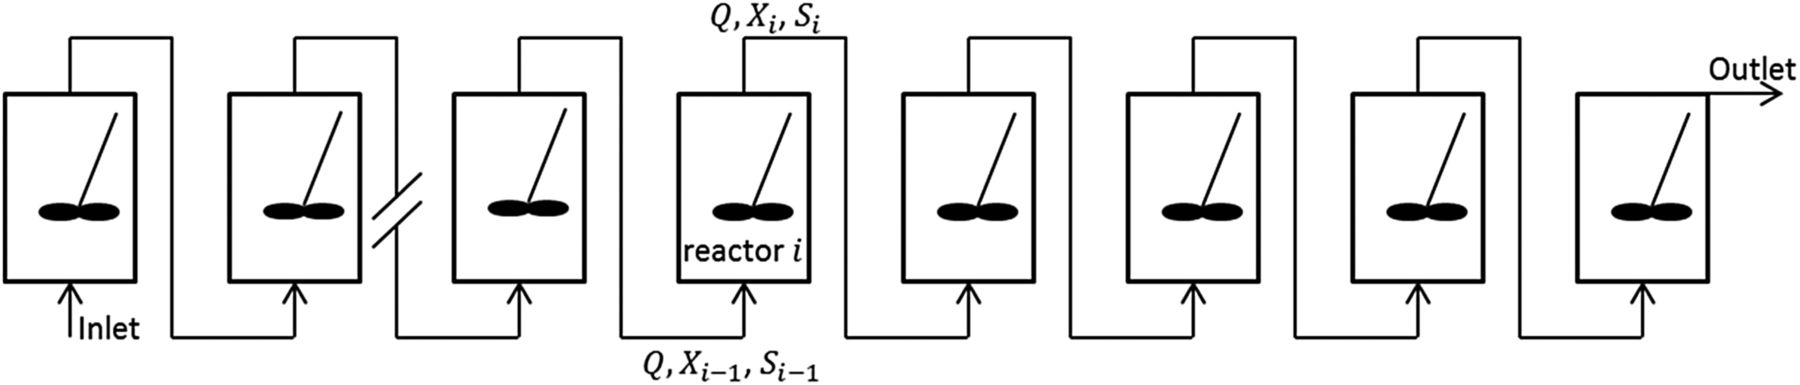

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [1]:
# Reactores Químicos en Serie. 
## Determinación del volumen de n reactores Mezcla Perfecta en serie


#%matplotlib notebook
import seaborn
import numpy as np
import pandas as pd
from scipy import optimize
from scipy.integrate import ode
import matplotlib.pyplot as mpl
import matplotlib.patches as patches
import random
import math
import ipywidgets as widgets
import IPython.core.display as di
from ipywidgets import interact, IntSlider, FloatSlider,fixed
import notebook
from IPython.display import clear_output, display, HTML, Image,Math, Latex
from IPython.external import mathjax

FigureSize=(10,5)


def generador_parametros(): #generación de parámetros de la ecuación cinética y Temperatura de trabajo
    global k, Ea, Ln_K0,T,Qv,Ca0,Xas
    
    Ea=random.uniform(40.,80.0)
    Ca0=round(random.uniform(5.,10.),1)
    Xas=round(random.uniform(0.5,1.0),3)
    Ln_K0 = random.uniform(15.,25.)
    T= random.uniform(40., 80.) #Temperatura en ºC
    T1=T+273.15 #Temperatura en K
    k = math.exp(Ln_K0)*math.exp(Ea*(-1000.)/(8.31*(T1))) #Para este caso n=1
    Qv=round(random.uniform(50,100),0) #Caudal volumétrico en L/min
    
    return k,T,Qv,Ca0,Xas


def Reactor_MP(Qv,k,Ca0,V): #Cálculo del volumen del rtor MP
    Cas=Ca0/(1+k*V/Qv)
    return Cas


def Bateria_Serie_EC_Diseno(V,Qv,k,Ca0,Xas,N):    
    Ca_salida=Ca0*(1-Xas)
    value=Ca_salida-Ca0/(1+k*V/Qv)**N 
    return value

def Volumen_Rtor_Bateria(Qv,k,Ca0,Xas,N):
    volumen=optimize.fsolve(Bateria_Serie_EC_Diseno, 1, args=(Qv,k,Ca0,Xas,N), xtol=1e-06, maxfev=500)
    return volumen


def Bateria_Serie_MP(V,N,Qv,k,Ca0):
    Concentraciones = [Ca0]
    Conversiones=[0]
    for i in range(N):
        Concentraciones.append(Reactor_MP(Qv, k, Concentraciones[i], V))
        xa=(Concentraciones[0]-Concentraciones[-1])/Concentraciones[0]
        Conversiones.append(xa)
    return Concentraciones,Conversiones
            

def f(Xa,V,n,k,Ca0,Qv): #ecuación cinética

    t_residencia=(Qv)/(k*(Ca0**(n-1))*(1-Xa)**n)
    return t_residencia


def Reactor_MP_Volumen(Qv,n,k,Ca0,Xas): #Cálculo del volumen del rtor MP

    Volumen=Qv*(Ca0*Xas/(((Ca0*(1-Xas))**n)*k))
    return Volumen


def Reactor_FP(Qv,n,k,Ca0,Xas):
       
    incr_Xa=0.005

    V = []
    Xa = []

    Xa0=0.
    V_inicial=0.
    
    V.append(0.)
    Xa.append(0.)

    r = ode(f).set_integrator('vode', method='bdf', nsteps=1000, atol = 1.0e-05, rtol = 1.0e-05)
    r.set_initial_value(V_inicial,Xa0).set_f_params(n,k,Ca0,Qv)
    #print(t[0], Ca[0])
    #print ('r_t: ',r.t,'Ca0: ',r.y)

    while r.successful() and Xa[-1]<=Xas:
        r.integrate(r.t + incr_Xa)
        #Ca[k1]=r.y
        V.append(r.y)
        Xa.append(r.t)
        #print ('tiempo:', '%.2f' % t[k], 'Ca:','%.4f'%Ca[k])
        XaFP=Xa

    return V[-1],XaFP


display(HTML('<h1 style="color:#000000"><strong>Reactores Químicos en Serie.</strong></h1>'))
display(HTML('<h2>Determinación del volumen de n reactores Mezcla Perfecta en serie</br>  </h2>' ))


display(HTML('''<script>
  function code_toggle() {
    if (code_shown){
      $('div.input').hide('500');
      $('#toggleButton').val('Mostrar código')
    } else {
      $('div.input').show('500');
      $('#toggleButton').val('Esconder código')
    }
    code_shown = !code_shown
  }

  $( document ).ready(function(){
    code_shown=false;
    $('div.input').hide()
  });
</script>
<form action="javascript:code_toggle()"><input type="submit" id="toggleButton" value="Mostrar código"></form>'''))

display(HTML('<h1 style="color:#000000"><strong>Avanzar para generar datos</strong></h1>'))
display(HTML('<p>Recuerda que una ecuación cinética de tipo potencial\
            tiene la forma:</br>  </p>' ))
display(Math(r'r=k\cdot C_A^n'))



display(HTML('<h1 style="color:#000000"><strong>Los datos del sistema son:</strong></h1>'))


k,T,Qv,Ca0,Xas=generador_parametros()


valores=[np.round(math.log(k),3),np.round(T,1),np.round(Qv,1),np.round(Ca0,2),np.round(Xas,3)]
etiquetas=['Ln k:', 'Temperatura (ºC)','Qv (L/min)','Ca0 (mol/L)','Conversión (Xas)']
data = dict(zip(etiquetas, valores))

values = pd.DataFrame(data,index=['Valores'], columns=etiquetas)


display(values)





#print ("Ln k: ",'%.3f' % math.log(k),  '; T (ºC): ','%.1f' % T, '; Qv (L/min): ','%.1f' % Qv,
      # '; Ca0 (mol/L): ','%.2f' % Ca0,  '; Xas: ','%.2f' % Xas)

display(HTML('<h1 style="color:#000000"><strong>Bateria de Reactores Mezcla Perfecta - CSTR (continuous flow stirred-tank reactor) en sus siglas en inglés -. </strong></h1>' ))
display(Image(filename='./Imagenes/Rtor Mezcla Completa en serie.jpeg'))



display(HTML('<h1 style="color:#000000"><strong>La ecuación de diseño de un reactor Mezcla Perfecta es:</br> </strong></h1>' ))
display(Math(r'\frac{V}{Q_V}=\frac{C_A^{salida} \cdot X_A}{(-R_A)}'))
display(HTML('<h1 style="color:#000000"><strong>La ecuación de diseño de una bateria de reactores Mezcla Perfecta es:</br> </strong></h1>' ))
display(Math(r'C_{A_{salida}}^{reactor\ N}=\frac{C_{A_{entrada}}^{reactor\ 1}}{\left (  1 + k \frac{V}{Q_V} \right )^N }'))



In [2]:

V_FP,Xa_FP=Reactor_FP(Qv,1,k,Ca0,Xas)

Volumen_Reactor_MP_Unico=Reactor_MP_Volumen(Qv,1,k,Ca0,Xas)
#parametros=[Qv,k,Ca0,Xas,V_FP,Xa_FP]


def Graficas(N,p):
    
    Qv,k,Ca0,Xas,V_FP,Xa_FP,Volumen_Reactor_MP_Unico=p
    Volumen_Rtor_MP=Volumen_Rtor_Bateria(Qv,k,Ca0,Xas,N)
    
    
    
    Concentraciones,Conversiones=Bateria_Serie_MP(Volumen_Rtor_MP,N,Qv,k,Ca0)

    Oscuridad=np.arange(1/N, 1+1/N, 1/N)


    fig1 = mpl.figure(figsize=FigureSize);
    mpl.clf()
    ax1 = fig1.add_subplot(121);
    height=[]
    for i in range(N):
        width=(Conversiones[i+1]-Conversiones[i])
        height.append(1/(k*Concentraciones[i+1]))
        ax1.add_patch(
        patches.Rectangle(
                    (Conversiones[i], 0.0),   # (xa_entrada, y=o)
                    width,          # width - (xa_salida-xa_entrada)
                    height[i],          # height - (1/-Ra)
                    alpha=Oscuridad[i]
                )
            );

    x_FP=np.asarray(Xa_FP)
    y_FP=1/(k*Ca0*(1-x_FP))
    mpl.plot(x_FP,y_FP,'k-', linewidth = 2);

    mpl.ylim((0, 1.05*max(height)))
    mpl.ylabel('1/-Ra')
    mpl.xlabel('Xa')

    Concentracion_inverso=sorted(Concentraciones,reverse=True)

    ax2 = fig1.add_subplot(122);
    for i in range(N):
        width=(Concentracion_inverso[i+1]-Concentracion_inverso[i])
        ax2.add_patch(
        patches.Rectangle(
                    (Concentracion_inverso[i], 0.0),   # (xa_entrada, y=o)
                    width,          # width - (xa_salida-xa_entrada)
                    height[i],          # height - (1/-Ra)
                    alpha=Oscuridad[i]
                )
            );

    Ca_FP=Ca0*(1-x_FP)
    mpl.plot(Ca_FP,y_FP,'k-', linewidth = 2);

    mpl.xlim((min(Concentracion_inverso)-0.5, 0.5+max(Concentracion_inverso)))
    mpl.ylim((0, 1.05*max(height)))

    mpl.ylabel('1/-Ra')
    mpl.xlabel('Ca')
    #mpl.rcParams['figure.figsize'] = (4., 2.)
    #mpl.rcParams['axes.titlesize'] ='large'
    #mpl.rcParams['axes.labelsize']= 'medium' 
    #mpl.rcParams['figure.dpi']= 600 
    mpl.tight_layout()    
    mpl.show();
    
    print ('El volumen de cada reactor es: ','%.1f' % Volumen_Rtor_MP,' L')    
    print ('El volumen total de la bateria de reactores es: ','%.1f' % (Volumen_Rtor_MP*N),' L \n')
    print ('El volumen del un único reactor Mezcla Perfecta sería: ','%.1f' % Volumen_Reactor_MP_Unico,' L')
    print ('El volumen del reactor Flujo Pistón sería: ','%.1f' % V_FP,' L')
    
s1=widgets.IntSlider(
    value=5.0,
    min=1.0,
    max=20.0,
    step=1,
    description='Nº Reactores:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d',
    slider_color='lightblue')

interact(Graficas,N=s1,p=fixed([Qv,k,Ca0,Xas,V_FP,Xa_FP,Volumen_Reactor_MP_Unico]));



interactive(children=(IntSlider(value=5, continuous_update=False, description='Nº Reactores:', max=20, min=1), Output()), _dom_classes=('widget-interact',))

In [3]:
display(HTML('''

<footer id="attribution" style="float:right; color:#999; background:#fff;">
Programado con Jupyter Notebook en Python 3.6. </footer>'''))